Business Context
This case requires trainees to develop a model for predicting fraudulent transactions for a
financial company and use insights from the model to develop an actionable plan. Data for the
case is available in CSV format having 6362620 rows and 10 columns.
Candidates can use whatever method they wish to develop their machine learning model.
Following usual model development procedures, the model would be estimated on the
calibration data and tested on the validation data. This case requires both statistical analysis and
creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the
results of your machine learning model.


step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for
customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers 
that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset 
the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal 
attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

Candidate Expectations
Your task is to execute the process for proactive detection of fraud while answering following
questions.
1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

solutions:

1:Data cleaning including missing values, outliers and multicollinearity?
After basic EDA on the data revealed there are no missing values in the dataset.

In the case of fraud anyone can be robbed from very small amounts to large sums of amounts so removing outliers may cause unwanted bias in the data.

Because we are going to use LOgistic regression I calculated Variance Inflation factor all the independent columns and found 4 columns "oldbalanceOrig, newbalanceOrig, oldbalanceDest, newbalanceDest" having high amount of multicollinearity, since logistic regression is the only model which will be affected I am removing mentioned columns only for Logistic regression

2:Describe your fraud detection model in elaboration.

After performing the above steps, there is a prominent bias issue with the data. So we implement imbalenceed-learn library to upsample the minority class by 50% for better performance of the model.

With the upsampled data we perform Logistic regression twice with multicollinearity data removed and in their presence.

We deploy models un-oversampled data and oversampled data to see the difference


3:How did you select variables to be included in the model?

We include all the data except for the columns that are affected by multicollinearity. 

As step describes the model if there is any particular time when fraud transaction takes place

we created one hot encoding on payment type to extra insight in the data

4:Demonstrate the performance of the model by using the best set of tools.

5,6:What are the key factors that predict fraudulent customers?Do these factors make sense? If yes, How? If not, How not?

When we performed EDA we noticed that most of the fraud transactions took place on these payment methods "cash-out, and transfer".
It is logical that a Fraudster wants to transfer funds from customers to their account. And if a card of the customer is lost, the robber might have transacted some amount by the time the customer noticed that card is lost and reports the card as lost.

Only the payment method transfer is marked as fraudulent in the data

7:What kind of prevention should be adopted while a company updates its infrastructure?

To make the predictions and stop the fraudulent transaction in real time the model should be retrained in regular intervals.

deploying best performing model to work on the real time data will help in prevention and adding customer feedback on fraudulent transactions can improve models accuracy

8:Assuming these actions have been implemented, how would you determine if they work?

Having implementing multiple classification models in different scenarios definitely I think model with over fitted sample data has 
best score yet.

Logistic regression with multicollinearity removed has low accuracy when compared other models with all the columns I think it is honest model

concluding Logistic regression, Naive bayes, Svm are my winning models
solutions:

1:Data cleaning including missing values, outliers and multicollinearity?
After basic EDA on the data revealed there are no missing values in the dataset.

In the case of fraud anyone can be robbed from very small amounts to large sums of amounts so removing outliers may cause unwanted bias in the data.

Because we are going to use LOgistic regression I calculated Variance Inflation factor all the independent columns and found 4 columns "oldbalanceOrig, newbalanceOrig, oldbalanceDest, newbalanceDest" having high amount of multicollinearity, since logistic regression is the only model which will be affected I am removing mentioned columns only for Logistic regression

2:Describe your fraud detection model in elaboration.

After performing the above steps, there is a prominent bias issue with the data. So we implement imbalenceed-learn library to upsample the minority class by 50% for better performance of the model.

With the upsampled data we perform Logistic regression twice with multicollinearity data removed and in their presence.

We deploy models un-oversampled data and oversampled data to see the difference


3:How did you select variables to be included in the model?

We include all the data except for the columns that are affected by multicollinearity. 

As step describes the model if there is any particular time when fraud transaction takes place

we created one hot encoding on payment type to extra insight in the data

4:Demonstrate the performance of the model by using the best set of tools.

we use classification reports to calculate f1 score, accuracy, recall, precision as the parameter to judge the model.

5,6:What are the key factors that predict fraudulent customers?Do these factors make sense? If yes, How? If not, How not?

When we performed EDA we noticed that most of the fraud transactions took place on these payment methods "cash-out, and transfer".
It is logical that a Fraudster wants to transfer funds from customers to their account. And if a card of the customer is lost, the robber might have transacted some amount by the time the customer notices that card is lost and reports the card as lost.

Only the payment method transfer is marked as fraudulent in the data

7:What kind of prevention should be adopted while a company updates its infrastructure?

To make the predictions and stop the fraudulent transaction in real time the model should be retrained in regular intervals.

deploying best performing model to work on the real time data will help in prevention and adding customer feedback on fraudulent transactions can improve models accuracy

8:Assuming these actions have been implemented, how would you determine if they work?

Having implementing multiple classification models in different scenarios definitely I think model with over fitted sample data has 
best score yet.

Logistic regression with multicollinearity removed has low accuracy when compared other models with all the columns I think it is honest model

concluding Logistic regression, Naive bayes, Svm are my winning models

# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing data

In [2]:
data=pd.read_csv("Fraud.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.step.describe()

count    6.362620e+06
mean     2.433972e+02
std      1.423320e+02
min      1.000000e+00
25%      1.560000e+02
50%      2.390000e+02
75%      3.350000e+02
max      7.430000e+02
Name: step, dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.isnull().sum().sort_values(ascending=True)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are no null values in the data

In [7]:
data.sample(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5985065,408,CASH_IN,186602.99,C64711544,5210064.69,5396667.68,C1578976125,412939.57,226336.58,0,0
2481211,204,CASH_OUT,382644.85,C2079133774,99794.00,0.00,C1350354405,587094.09,969738.94,0,0
3138432,236,CASH_IN,33109.77,C313894667,4322.00,37431.77,C746451811,83678.39,50568.62,0,0
6341204,692,TRANSFER,197395.35,C1046153527,0.00,0.00,C1441507177,960410.96,1157806.32,0,0
2549166,206,CASH_OUT,4122.30,C1725990129,70392.00,66269.70,C520849572,90652.99,94775.29,0,0
1568383,155,CASH_OUT,136230.11,C1163314638,146764.00,10533.89,C1531823160,122574.48,258804.58,0,0
2741847,212,CASH_IN,91360.66,C1067892138,1042.00,92402.66,C2130646718,74696.00,0.00,0,0
282070,15,CASH_OUT,626881.79,C258306433,20973.00,0.00,C1128288127,0.00,626881.79,0,0
252782,14,PAYMENT,10636.49,C1564207396,0.00,0.00,M1907029062,0.00,0.00,0,0
4907966,349,PAYMENT,24941.70,C1608794644,323100.00,298158.30,M47740993,0.00,0.00,0,0


type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

In [8]:
data.step.nunique()

743

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


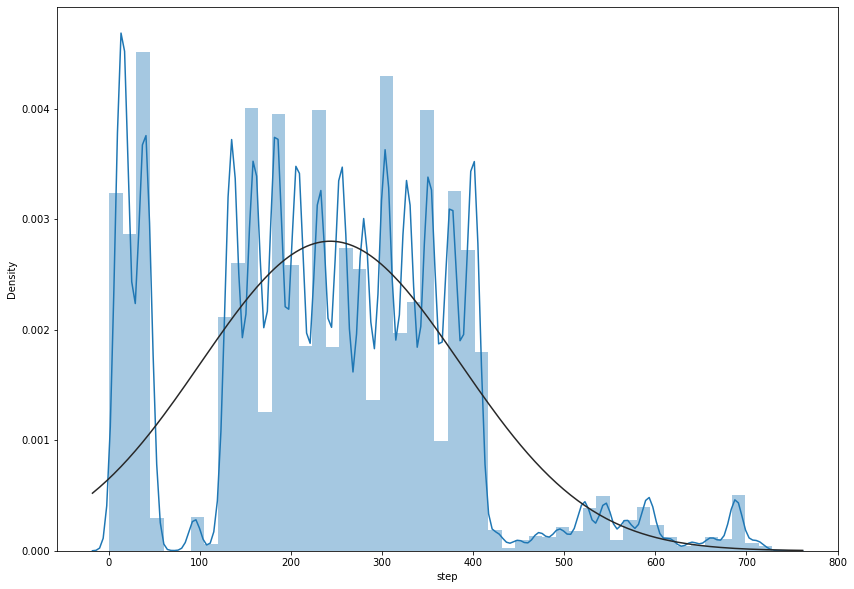

In [9]:
plt.rcParams['figure.figsize'] = (14,10)
from scipy.stats import norm
res=sns.distplot(data.step,fit=norm)
plt.show()

In [10]:
data.type.value_counts()/data.type.shape[0]

CASH_OUT    0.351663
PAYMENT     0.338146
CASH_IN     0.219923
TRANSFER    0.083756
DEBIT       0.006512
Name: type, dtype: float64

In [11]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

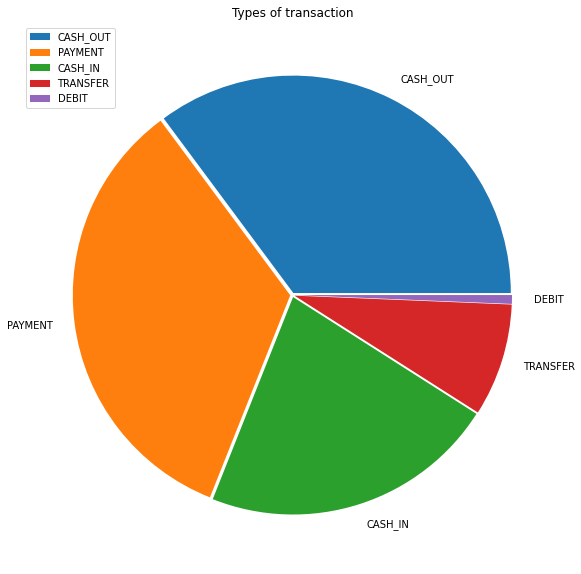

In [12]:
labels=["CASH_OUT","PAYMENT","CASH_IN","TRANSFER","DEBIT"]
size=(2237500,2151495,1399284,532909,41432)
explode = [0.01, 0.01, 0.01, 0.01, 0.01]
plt.pie(size,labels=labels,explode=explode)
plt.title("Types of transaction")
plt.legend()
plt.show()

In [13]:
data.amount.describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

In [14]:
data.amount.nunique()

5316900

In [15]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# nameOrig - customer who started the transaction

In [16]:
data.nameOrig.value_counts()

C1530544995    3
C1976208114    3
C545315117     3
C2051359467    3
C1902386530    3
              ..
C301921216     1
C94148084      1
C260937308     1
C1893694270    1
C442519530     1
Name: nameOrig, Length: 6353307, dtype: int64

In [17]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [18]:
data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [19]:
data.loc[data.isFraud == 1].type.drop_duplicates().values

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [20]:
data.loc[data.isFlaggedFraud==1].type.drop_duplicates().values

array(['TRANSFER'], dtype=object)

here we can see that transaction types "transfer and cash out" has fraud transactions but only "transfer" type transactions are flagged

In [21]:
cor=data.corr()

In [22]:
cor.isFlaggedFraud

step              0.003277
amount            0.012295
oldbalanceOrg     0.003835
newbalanceOrig    0.003776
oldbalanceDest   -0.000513
newbalanceDest   -0.000529
isFraud           0.044109
isFlaggedFraud    1.000000
Name: isFlaggedFraud, dtype: float64

In [23]:
dummie=pd.get_dummies(data.type)

In [24]:
dummie

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
6362615,0,1,0,0,0
6362616,0,0,0,0,1
6362617,0,1,0,0,0
6362618,0,0,0,0,1


In [25]:
data=data.drop(["type"],axis=1)

In [26]:
data=pd.concat([dummie,data],axis=1)

In [27]:
data

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,0,0,1,0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,0,0,0,1,0,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,0,0,0,0,1,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,0,1,0,0,0,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,0,0,0,1,0,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,0,1,0,0,0,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,0,0,0,0,1,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,0,1,0,0,0,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,0,0,0,0,1,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [28]:
cor=data.corr()

In [29]:
cor.isFlaggedFraud

CASH_IN          -0.000842
CASH_OUT         -0.001168
DEBIT            -0.000128
PAYMENT          -0.001133
TRANSFER          0.005245
step              0.003277
amount            0.012295
oldbalanceOrg     0.003835
newbalanceOrig    0.003776
oldbalanceDest   -0.000513
newbalanceDest   -0.000529
isFraud           0.044109
isFlaggedFraud    1.000000
Name: isFlaggedFraud, dtype: float64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   CASH_IN         uint8  
 1   CASH_OUT        uint8  
 2   DEBIT           uint8  
 3   PAYMENT         uint8  
 4   TRANSFER        uint8  
 5   step            int64  
 6   amount          float64
 7   nameOrig        object 
 8   oldbalanceOrg   float64
 9   newbalanceOrig  float64
 10  nameDest        object 
 11  oldbalanceDest  float64
 12  newbalanceDest  float64
 13  isFraud         int64  
 14  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(2), uint8(5)
memory usage: 515.8+ MB


In [31]:
obj=data.select_dtypes(include="object")

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [33]:
obj.nameOrig.value_counts()

C1530544995    3
C1976208114    3
C545315117     3
C2051359467    3
C1902386530    3
              ..
C301921216     1
C94148084      1
C260937308     1
C1893694270    1
C442519530     1
Name: nameOrig, Length: 6353307, dtype: int64

In [34]:
obj.nameDest.value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C1590550415    101
              ... 
M1752434966      1
M1305816139      1
M21516031        1
M817467553       1
M305632994       1
Name: nameDest, Length: 2722362, dtype: int64

In [35]:
obj=obj.apply(le.fit_transform)

In [36]:
obj.nameDest.value_counts()

84652      113
567820     109
472721     105
320660     102
349730     101
          ... 
2024035      1
2019941      1
2015847      1
2011753      1
300908       1
Name: nameDest, Length: 2722362, dtype: int64

In [37]:
data=data.drop(["nameDest","nameOrig"],axis=1)

In [38]:
data=pd.concat([data,obj],axis=1)

In [39]:
data

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig,nameDest
0,0,0,0,1,0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,757869,1662094
1,0,0,0,1,0,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,2188998,1733924
2,0,0,0,0,1,1,181.00,181.00,0.00,0.00,0.00,1,0,1002156,439685
3,0,1,0,0,0,1,181.00,181.00,0.00,21182.00,0.00,1,0,5828262,391696
4,0,0,0,1,0,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,3445981,828919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,0,1,0,0,0,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,5651847,505863
6362616,0,0,0,0,1,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,1737278,260949
6362617,0,1,0,0,0,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,533958,108224
6362618,0,0,0,0,1,743,850002.52,850002.52,0.00,0.00,0.00,1,0,2252932,319713


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
X_variables=data.drop("isFraud",axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

In [42]:
vif_data

,feature,VIF
0,CASH_IN,3.541341
1,CASH_OUT,3.343194
2,DEBIT,1.044426
3,PAYMENT,9.201451
4,TRANSFER,1.777429
5,step,1.002764
6,amount,4.045355
7,oldbalanceOrg,555.056465
8,newbalanceOrig,571.601534
9,oldbalanceDest,68.106458


We can see that these four columns "oldbalanceorig, newbalanceorig, oldbalancedest and oldbalancedest" has multicolinearity than the acceptable limit since multicolinearity is a major issue logistic regression we remove those colums only for logistic regression. As these coloumns names of orign and destination might be useful if the scammer is using the same account to store.

In [43]:
dummie1=list(data.loc[data.isFraud==1].nameDest.drop_duplicates().values)

In [44]:
len(dummie1)

8169

In [45]:
dummie2=list(data.loc[data.isFraud==1].nameDest.values)

In [46]:
dummie2=pd.DataFrame(dummie2)
dummie2.value_counts()

301992    2
468311    2
416882    2
425624    2
55009     2
         ..
195612    1
195606    1
195537    1
195526    1
571948    1
Length: 8169, dtype: int64

In [47]:
len(data.loc[data.isFraud==1])

8213

from this we can see that out of 8213 fraud transaction only 44 transaction went into same destination out of which none of them are repetative transactions

In [48]:
pip install imbalanced-learn

In [49]:
from imblearn.over_sampling import RandomOverSampler

In [50]:
oversample = RandomOverSampler(sampling_strategy=0.5)

In [51]:
x=data.drop("isFraud",axis=1)
y=data.isFraud


In [52]:
x_over,y_over=oversample.fit_resample(x,y)

In [53]:
from collections import Counter
print(Counter(y))
print(Counter(y_over))

Counter({0: 6354407, 1: 8213})
Counter({0: 6354407, 1: 3177203})


now we oversampled minority data to be equally biased

In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [55]:
x_log=x_over.drop(["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"],axis=1)
y_log=y_over

In [56]:
from sklearn.model_selection import train_test_split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(x_log,y_log , 
                          random_state=104,
                          train_size=0.8, shuffle=True)

In [57]:
X_train_log.shape,y_train_log.shape,X_test_log.shape,y_test_log.shape

((7625288, 10), (7625288,), (1906322, 10), (1906322,))

In [58]:
lr.fit(X_train_log,y_train_log)

LogisticRegression()

In [59]:
lr.score(X_train_log,y_train_log)

0.76962234082175

In [60]:
ypred=lr.predict(X_test_log)

In [61]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_log, ypred)

print(cm)

[[1107192  162731]
 [ 275137  361262]]


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test_log,ypred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83   1269923
           1       0.69      0.57      0.62    636399

    accuracy                           0.77   1906322
   macro avg       0.75      0.72      0.73   1906322
weighted avg       0.76      0.77      0.76   1906322



In [63]:
X_train, X_test, y_train, y_test = train_test_split(x,y , 
                          random_state=104,
                          train_size=0.8, shuffle=True)

In [64]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5090096, 14), (5090096,), (1272524, 14), (1272524,))

In [65]:
  models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(max_iter=15000)

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

accuracy, precision, recall ,f1__score= {}, {}, {},{}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1__score[key]=f1_score(predictions,y_test)

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [67]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['f1-score'] = f1__score.values()
df_model

,Accuracy,Precision,Recall,f1-score
Logistic Regression,0.999069,0.410333,0.782559,0.538372
Support Vector Machines,0.999071,0.459620,0.739962,0.567033
Decision Trees,0.999646,0.865202,0.867262,0.866231
Random Forest,0.999658,0.750000,0.989037,0.853090
Naive Bayes,0.992333,0.173397,0.033730,0.056474
K-Nearest Neighbor,0.999284,0.531473,0.880039,0.662718


# performing same model with over  sampled data

In [68]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(x_over,y_over , 
                          random_state=104,
                          train_size=0.8, shuffle=True)

In [69]:
  models_over = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models_over['Logistic Regression'] = LogisticRegression(max_iter=15000)

# Support Vector Machines
from sklearn.svm import LinearSVC
models_over['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models_over['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models_over['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models_over['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models_over['K-Nearest Neighbor'] = KNeighborsClassifier()

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

accuracy, precision, recall, f1__score = {}, {}, {},{}

for key in models_over.keys():
    
    # Fit the classifier
    models_over[key].fit(X_train_over, y_train_over)
    
    # Make predictions
    predictions = models_over[key].predict(X_test_over)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test_over)
    precision[key] = precision_score(predictions, y_test_over)
    recall[key] = recall_score(predictions, y_test_over)
    f1__score[key]=f1_score(predictions,y_test_over)

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [71]:
df_model_over = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model_over['Accuracy'] = accuracy.values()
df_model_over['Precision'] = precision.values()
df_model_over['Recall'] = recall.values()
df_model_over['f1-score'] = f1__score.values()
df_model_over

,Accuracy,Precision,Recall,f1-score
Logistic Regression,0.933639,0.864282,0.931993,0.896861
Support Vector Machines,0.886566,0.763961,0.880432,0.818072
Decision Trees,0.999903,1.000000,0.999709,0.999855
Random Forest,0.999975,1.000000,0.999925,0.999962
Naive Bayes,0.814226,0.520288,0.871416,0.651557
K-Nearest Neighbor,0.998972,1.000000,0.996930,0.998462
